In this post, I will compare the output of frequentist and bayesian statistics, and explain how these two approaches can be complementary, in particular for unclear results resulting from a frequentist approach.

For a first proof of concept, I will use the famous Titanic dataset, that every first Kaggle user is exposed to upon registration ;) <br>
Of course, these statistics can be applied on any other dataset. I selected the Titanic dataset because it has a large range of variables, and more importantly, offers interesting statistical situations to make a point.

In [14]:
import os
os.chdir('/home/julien/website/datasets')

In [15]:
import pandas as pd
df = pd.read_csv('titanic.csv')

import matplotlib.pyplot as plt

For the ones not familiar with the Titanic dataset, it offers a range of variables that can be used to predict the likelihood of having survived the accident that sunk the boat back then. <br>
You will find all kind of approaches to analyse this dataset, as well as machine learning techniques to predict survival, online. <br> FYI, the variables are listed below: 

In [16]:
[print(i) for i in df.columns]

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


[None, None, None, None, None, None, None, None, None, None, None, None]

<br>
If you do the analysis yourself, you will find out that some variables are pretty good at predicting survival. For the sake of argumentation, and because I think it offers a nice explanatory power, let's look at the variable age

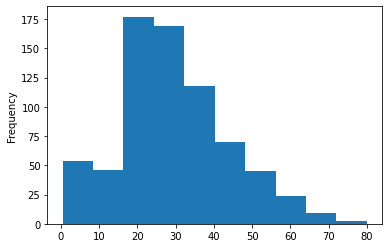

In [17]:
df.Age.plot(kind='hist')

Since we want to investigate the effect of age on survival, let's split that accordingly:

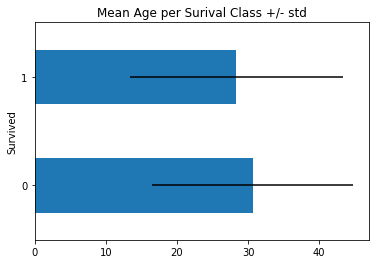

In [9]:
(df.groupby('Survived')
.apply(lambda d: pd.Series({
    "std": d.Age.std(),
    "sem": d.Age.std() /  d.Age.count(),
    "avg": d.Age.mean()
}))
.plot(kind='barh', 
       y = "avg", 
       legend = False, 
       title = "Mean Age per Surival Class +/- std", 
       xerr = "std"
      )

);

From a simple bar plot, there does not seem to be a crazy difference in the age of passengers that survived and did not survived the accident. <br>
Moreover, the error bars are really overlapping, suggesting that these distributions are not significantly different.<br>

Let's test that statistically.

Note: There are many packages out there that would allow you to run Bayesian stats from code.
However, during my time in research, I got used to the open source software [JASP](https://jasp-stats.org/), which offers a user-friendly interface. <br>

### Loading data in JASP

Let's first load the Titanic dataset in JASP:

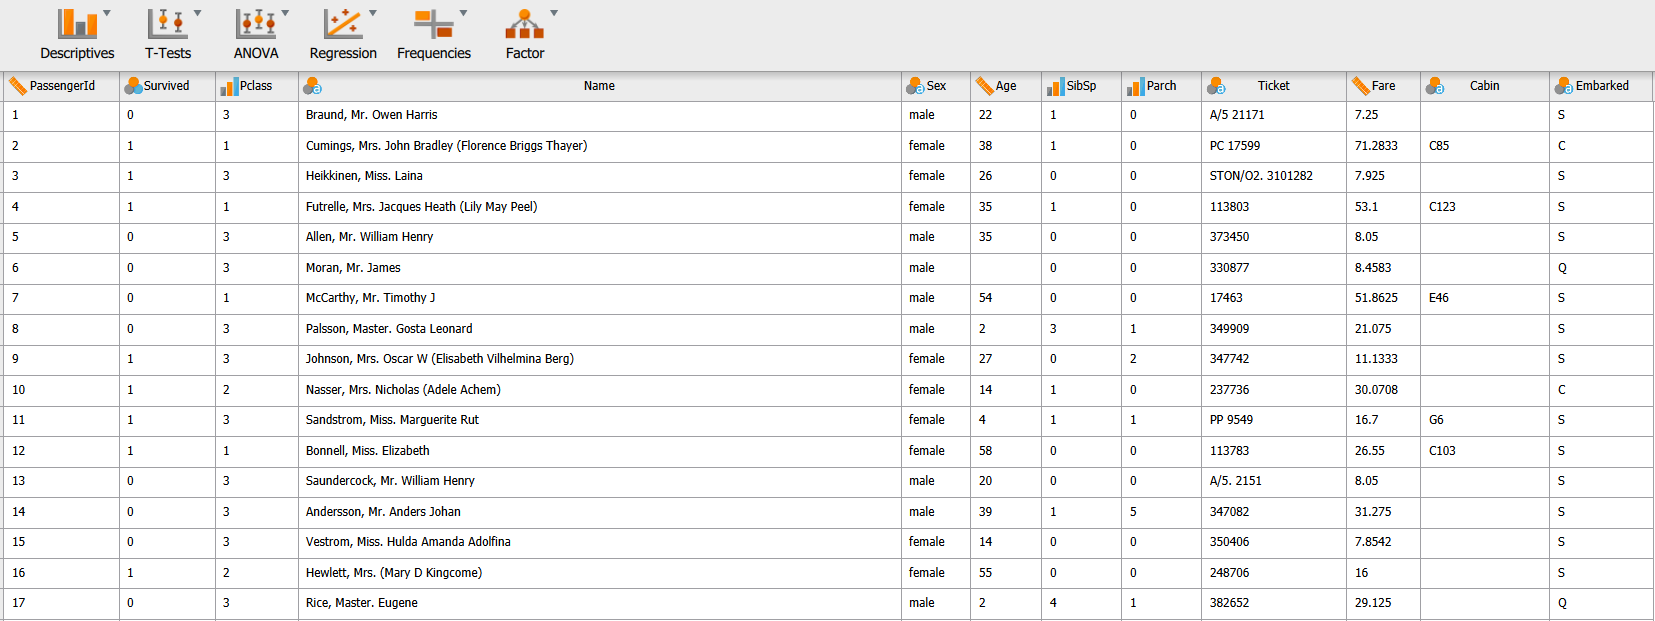

In [4]:
from IPython.display import Image
PATH = "/home/julien/website/content/images/2020.07_bayes/"
Image(filename = PATH + "slide1_dataset.PNG", width=1000, height=1200)

Above you can see that JASP automatically reorganizes the data in columns in a nice readible way.

Now JASP allows you to perform basic statistical testing from both frequentist and bayesian approaches.
Let's first start with the classic frequentist approach.

Below, you see a screenshot of the JASP window that pops out when you want to do an independent sample t test, which is what we should be doing if we want to test whether passengers that survived had a significantly different age than people that died due to the tragedy.

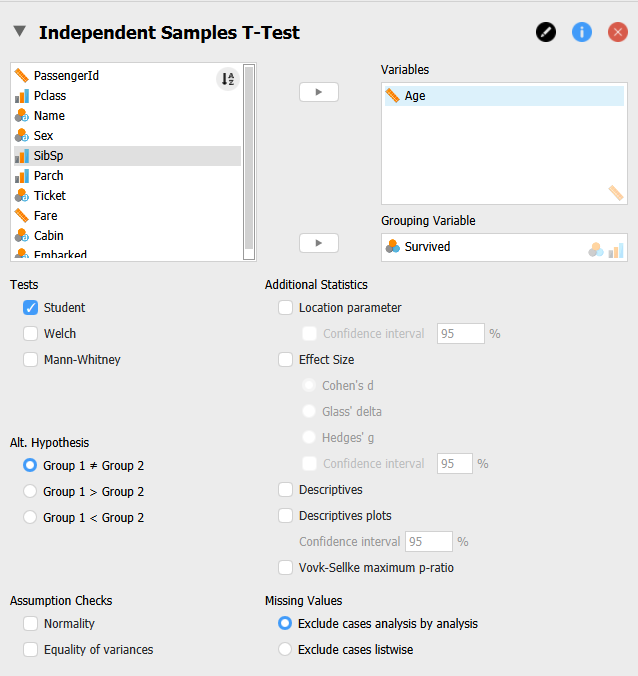

In [42]:
Image(filename = PATH + "Slide2_independent_sample_descri.PNG", width=800, height=800)

As you can see, there is a lot of options that one could change, such as the type of test (Student, Welch, Mann-Whitney if you want to do a non parametric test), whether you have a hypothesis for the testing (one or two sided test). Additionally, you can also obtain more descriptive statistics if you want to explore your dataset using JASP.

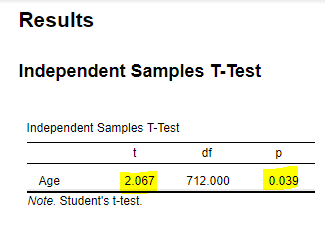

In [11]:
Image(filename = PATH + "Slide2_independent_sample_result.PNG", width=400, height=400)

Quite surprisingly, the test shows a significant difference between the two distributions (t(712) = 2.067, P = 0.039), i.e., the observed difference in age is unlikely under the null hypothesis. The p-value really flirts with the typical 0.5 alpha level, suggesting that this effect is significant according to frequentist statistics. <br> Before moving on, we should be looking at other measures than the p-value (effect size, see [here](https://juls-dotcom.github.io/meta_analysis_intro.html), but since this post is about comparing frequentist and bayesian approach, I will just move on.

Now let's look at what a Bayesian Independant Sample t-test would show.

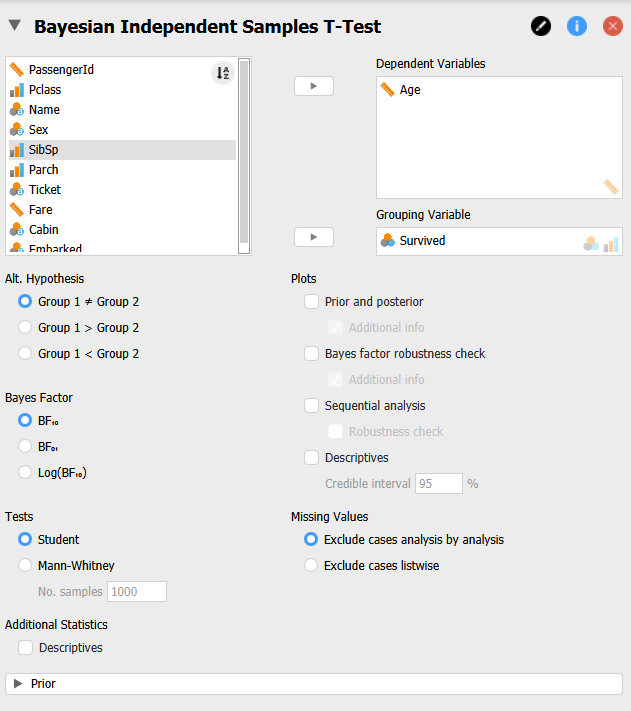

In [45]:
Image(filename = PATH + "Slide4_independent_sample_bayes_descr.PNG", width=600, height=600)

The Bayesian test outputs a so-called Bayes Factor (BF), which is the relative predictive performance of the null hypothesis H0 versus the alternative hypothesis H1. See [here](https://www.nature.com/articles/s41593-020-0660-4.epdf?sharing_token=OEe5lhDTKmPD-JVThUeOa9RgN0jAjWel9jnR3ZoTv0PHIohlcfgrTQy6CxWqCOTEfIBOYTdNkvPex4btLHhH7VX5FjtgHAMifLTBWpcGkJqaZ-_DSR9dfqG6s8cfxeqQb9PmbPysPgdRVMBi3DZ0MG1NugP_meKZVesy2x9Xv3A%3D).<br>
We find interesting options in the main window, that would allow you to perform a one sided or two sided test ("Alt. Hypothesis", indicate by "+" in JASP), as well as BF manipulations that allow you to calculate that ratio for each comparison, BF10 (hyp 1 vs hyp 0) and BF01 (reverse comparison). <br><br> In our case, we select BF10, which represents the likelihood of the data under the 1 Hypothesis compared to the likelihood of the data under the null hypothesis (in math terms: p(data | H1) / p(data | H0)).

I suggest that you also explore the nice plots options that will allow you to visualize your prior and posterior distributions (that is for a separate post though...).

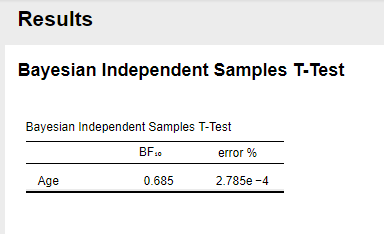

In [46]:
Image(filename = PATH + "Slide5_independent_sample_bayes_result.PNG", width=600, height=600)

As I was mentioning before, the output of a bayesian statistical test is not a p-value, but a Bayes Factor. 


While I do not like the concept of arbitrary threshold, these ideas can be useful to draw meaningful conclusions about the data. <br><br>In the frequentist world, the typical arbitrary threshold is 0.05, below which the effect is said to be significant. <br><br>
In the Bayesian world, and according to initial classifications by [Jeffreys](https://arxiv.org/pdf/0804.3173.pdf), the following nomenclature could be used:
 * BF < 1/3: evidence **against** the null hypothesis
 * 1/3 < BF < 3 : Anecdotical evidence
 * BF > 3: Evidence **for** the null hypothesis

In our case, we obtain a BF = 0.685, meaning that our data was 0.685 times more likely under H1 that under H0. According to initial classifications by Jeffreys, this speaks for a absence of evidence for H0, that is we cannot conclude that age does not affect the likelihood of survival in the Titanic accident. I insist here: since the BF is not below 1/3, we cannot claim that the have obtained evidence of the absence of effect of age on survival. In such situations, more data might be needed to observe how the BF might evolve with more accumulating data. <br><br>I like to think of Bayes Factor resuts in the following terms: "How much should I change my belief that age has (or had in this case) an impact on the survival likelihood of the titanic disaster?". The answer is the Bayes Factor. Depending on your prior belief (that would be the prior, that you can adapt based on what you already know from the data), the BF will be then different, depending on the strength of the effect. <br><br> Here, it seems that I should not change my belief by much.

## Evidence of Absence

Let's now use another famous dataset, the boston housing dataset, to explore another situation.

In [10]:
df_housing = pd.read_csv('BostonHousing.csv')

Below I am plotting the price of the houses (which you are supposed to predict in the initial tasks), per location regarding the Charles River.

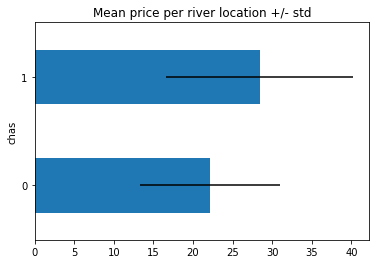

In [11]:
(df_housing.groupby('chas')
.apply(lambda d: pd.Series({
    "std": d.medv.std(),
    "sem": d.medv.std() /  d.medv.count(),
    "avg": d.medv.mean()
}))
.plot(kind='barh', 
       y = "avg", 
       legend = False, 
       title = "Mean price per river location +/- std", 
       xerr = "std"
      )

);

As we can see, the prices are higher for True values (close to the Charles River) than for False values. <br>
Now, let's explore this observation statistically.

I won't be showing the screenshots of the JASP results here, but only the results.

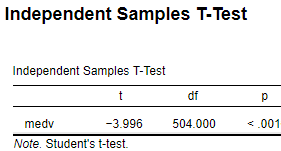

In [18]:
Image(filename = PATH + "Slide5_independent_boston.PNG", width=400, height=400)

A frequentist independent sample t-test shows a highly significant difference between the two distributions (t(504) = -3.996, P < 0.001), i.e., the observed difference in housing price is significant between accomodations located on and far from the Charles River. <br><br>
Let's see what we obtain with a bayesian test.

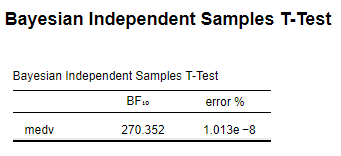

In [7]:
Image(filename = PATH + "Slide5_independent_bayes_boston.PNG", width=400, height=400)

The bayesian approach confirms that observations with a very high BF value, suggesting that the data is 270 times more likely under the H1 hypothesis, than under the H0.<br><br>
So far, so good. Both approaches make sense. Now let's look at another variable where we might be able to use the power of the bayesian approach a bit more clearly.

Instead of looking at a variable that is likely to show a difference in price, let's look at another one: the "zn" variable, i.e., the proportion of residential land zoned for lots over 25,000 sq.ft.

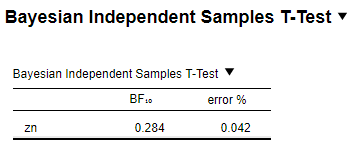

In [13]:
Image(filename = PATH + "Slide5_independent_sample_bayes_boston_Zn.PNG", width=400, height=400)

Here, BF10 = 0.284. This value is below 1/3 and, according to the nomenclature mentioned above, this time, our data provides moderate evidence for H0, i.e., that locations on or far from the Charles River does not lead to a higher proportion in industrial zone. This result should be opposed to a moderate evidence of absence as we found before in the Titanic dataset. This illustrates how we can not only quantify the strength of an effect, but also the absence of evidence for an effect. 

## Combining the frequentist and bayesian approach

The most powerful approach to such statistical testing is probably to report both frequentist and bayesian approaches. This is something we have done in a [recent publication](https://linkinghub.elsevier.com/retrieve/pii/S0960982220300178), to accomodate both frequentist and bayesian reviewers. But beyond the point of meeting the reader's statistical expectations, this post has showed that using both approaches combined can be beneficial in particular in cases were frequentist p values are above the significance threshold. In such cases, Bayes Factors allow to disentangle between evidence for absence and absence of evidence.